In [ ]:
import pandas as pd
df = pd.read_csv('airline_passenger_satisfaction.csv')

In [ ]:
# Changing Categorical Data to Numeric
df['Gender']= [1 if i == 'Male' else 0 for i in df['Gender']]
df['customer_type'] = [1 if i == 'Loyal Customer' else 0 for i in df['customer_type']]
df['type_of_travel'] = [1 if i == 'Business travel' else 0 for i in df['type_of_travel']]
df['satisfaction'] = [1 if i=='satisfied' else 0 for i in df['satisfaction']]
dummmy_class = pd.get_dummies(df['customer_class'], prefix='Class')
df = pd.concat([df, dummmy_class], axis=1)
df = df.drop(['customer_class'], axis = 1)
df.drop(columns=df.columns[0], axis=1, inplace=True)

In [ ]:

#Checking columns with null values or empty values
for i in df.columns:
  print(i,":",df[i].isna().sum())

Gender : 0
customer_type : 0
age : 0
type_of_travel : 0
flight_distance : 0
inflight_wifi_service : 0
departure_arrival_time_convenient : 0
ease_of_online_booking : 0
gate_location : 0
food_and_drink : 0
online_boarding : 0
seat_comfort : 0
inflight_entertainment : 0
onboard_service : 0
leg_room_service : 0
baggage_handling : 0
checkin_service : 0
inflight_service : 0
cleanliness : 0
departure_delay_in_minutes : 0
arrival_delay_in_minutes : 393
satisfaction : 0
Class_Business : 0
Class_Eco : 0
Class_Eco Plus : 0


In [ ]:
df['arrival_delay_in_minutes'].fillna((df['arrival_delay_in_minutes'].mean()), inplace=True)

#Checking columns with null values or empty values
for i in df.columns:
  print(i,":",df[i].isna().sum())

Gender : 0
customer_type : 0
age : 0
type_of_travel : 0
flight_distance : 0
inflight_wifi_service : 0
departure_arrival_time_convenient : 0
ease_of_online_booking : 0
gate_location : 0
food_and_drink : 0
online_boarding : 0
seat_comfort : 0
inflight_entertainment : 0
onboard_service : 0
leg_room_service : 0
baggage_handling : 0
checkin_service : 0
inflight_service : 0
cleanliness : 0
departure_delay_in_minutes : 0
arrival_delay_in_minutes : 0
satisfaction : 0
Class_Business : 0
Class_Eco : 0
Class_Eco Plus : 0


In [ ]:

df.to_csv('CleanedData.csv', index = False)

0    73452
1    56428
Name: satisfaction, dtype: int64

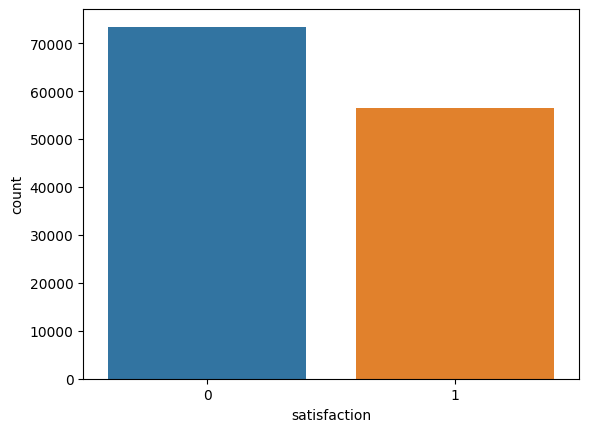

In [ ]:
# Import seaborn
import seaborn as sns

# The number of Time Band in the dataset and its graphic for Inpatient.
sns.countplot(x = "satisfaction", data = df)
df.loc[:,"satisfaction"].value_counts()

# **#NAIVE BAYES WITHOUT PREPRCESSING**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Split the DataFrame into training and testing sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=43)

# Separate features and target variable for training data
x_train = train_data.drop(["satisfaction"], axis=1)
y_train = train_data.satisfaction.values

# Separate features and target variable for testing data
x_test = test_data.drop(["satisfaction"], axis=1)
y_test = test_data.satisfaction.values


In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Build a Multinomial Naive Bayes
model = MultinomialNB()

# Model training -- model.fit() is used to make predictions using given data i.e. it fits/maps
# the given data to the model
# creating the contingency probability table like we saw in the lecture

model.fit(x_train, y_train)
print("print Train for accuracy of NBC algo: ", model.score(x_train,y_train))
print("print Test for accuracy of NBC algo: ", model.score(x_test,y_test))

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuracy)
print("F1 Score:", f1)

print Train for accuracy of NBC algo:  0.5991492146596858
print Test for accuracy of NBC algo:  0.6009393286110256
Accuracy: 0.6009393286110256
F1 Score: 0.5993394039738881


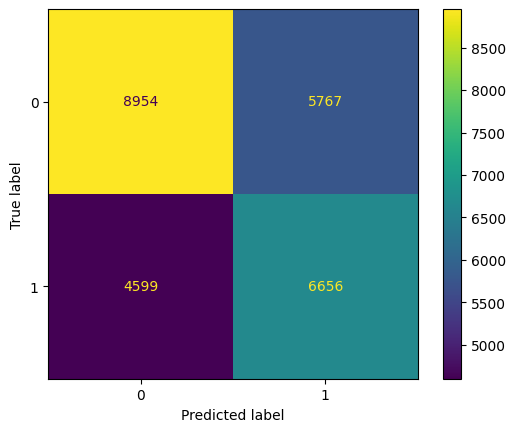

In [ ]:
labels = [0,1]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

# NAIVE BAYES WITH SELETCED COLUMNS ONLY

In [ ]:
# NAIVE BAYES WITH SELETCED COLUMNS ONLY
df = pd.read_csv('FeatureSelectedDataset.csv')
import pandas as pd
from sklearn.model_selection import train_test_split

# Split the DataFrame into training and testing sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=43)

# Separate features and target variable for training data
x_train = train_data.drop(["satisfaction"], axis=1)
y_train = train_data.satisfaction.values

# Separate features and target variable for testing data
x_test = test_data.drop(["satisfaction"], axis=1)
y_test = test_data.satisfaction.values

from sklearn.naive_bayes import MultinomialNB

# Build a Multinomial Naive Bayes
model = MultinomialNB()

# Model training -- model.fit() is used to make predictions using given data i.e. it fits/maps
# the given data to the model
# creating the contingency probability table like we saw in the lecture

model.fit(x_train, y_train)
print("print Train for accuracy of NBC algo: ", model.score(x_train,y_train))
print("print Test for accuracy of NBC algo: ", model.score(x_test,y_test))

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuracy)
print("F1 Score:", f1)


print Train for accuracy of NBC algo:  0.6169380918823427
print Test for accuracy of NBC algo:  0.6227894045872268
Accuracy: 0.6227894045872268
F1 Score: 0.6249517803144968


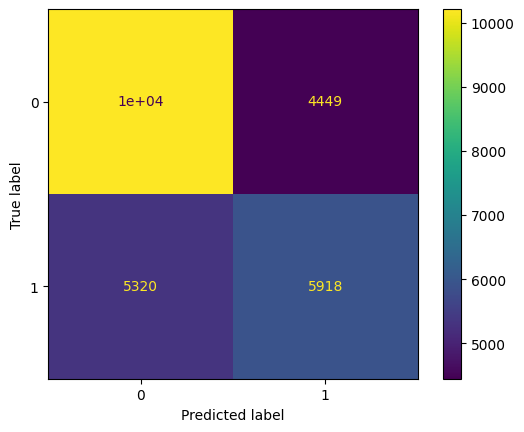

In [ ]:
labels = [0,1]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

# **Naive Bayes with Cross Validation**

In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# Lets split the data into 10 folds.
# We will use this 'stratified_cv'(StratiFiedKFold splitting stratergy) object as input to cross_val_score() method
# The folds are made by preserving the percentage of samples for each class.
x = df.iloc[:, :-1]
y = df.satisfaction
stratified_cv = StratifiedKFold(n_splits = 10, shuffle=True, random_state=42)

cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in stratified_cv.split(x, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1

y

Fold:1, Train set: 116538, Test set:12949
Fold:2, Train set: 116538, Test set:12949
Fold:3, Train set: 116538, Test set:12949
Fold:4, Train set: 116538, Test set:12949
Fold:5, Train set: 116538, Test set:12949
Fold:6, Train set: 116538, Test set:12949
Fold:7, Train set: 116538, Test set:12949
Fold:8, Train set: 116539, Test set:12948
Fold:9, Train set: 116539, Test set:12948
Fold:10, Train set: 116539, Test set:12948


0         0
1         0
2         1
3         0
4         1
         ..
129482    0
129483    1
129484    0
129485    1
129486    0
Name: satisfaction, Length: 129487, dtype: int64

In [ ]:
# Create the predicted value using MultinomialNB and StratifiedCV

classifier = MultinomialNB()
predicted = cross_val_predict(classifier, x, y, cv=stratified_cv)

# print(f'Scores for each fold are: {predicted}')
print('Average score: ',predicted.mean())

Average score:  0.39737579834269077


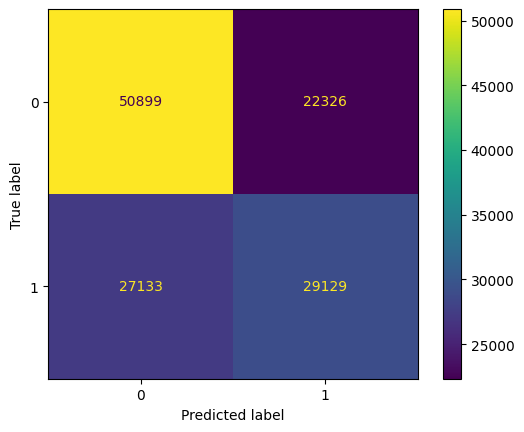

In [ ]:
# Print the confusion matrix
class_labels = [0, 1]
confusion = confusion_matrix(y, predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=class_labels)
disp.plot()